In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [27]:
# each point is height, width, color (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower = [4.5, 1]

In [7]:
def sigmoid(x: float) -> float:
    return 1 / (1 + np.exp(-x))

def sigmoid_p(x: float) -> float:
    return sigmoid(x) * (1 - sigmoid(x))

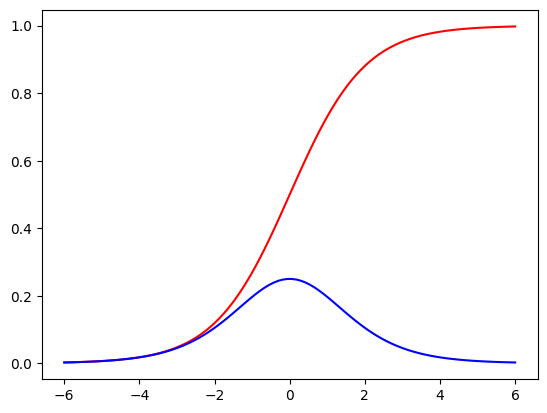

In [10]:
T = np.linspace(-6, 6, 100)
plt.plot(T, sigmoid(T), c = 'r')
plt.plot(T, sigmoid_p(T), c= 'b')

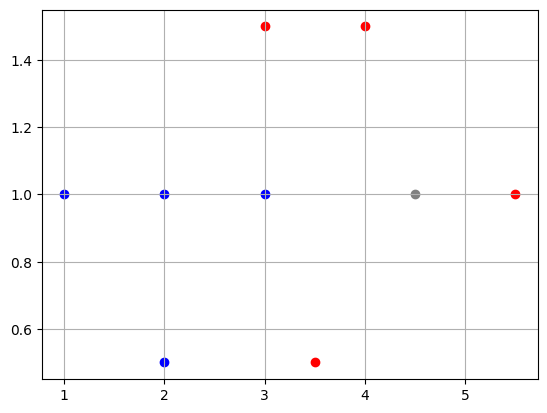

In [35]:
# scatter plot

def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

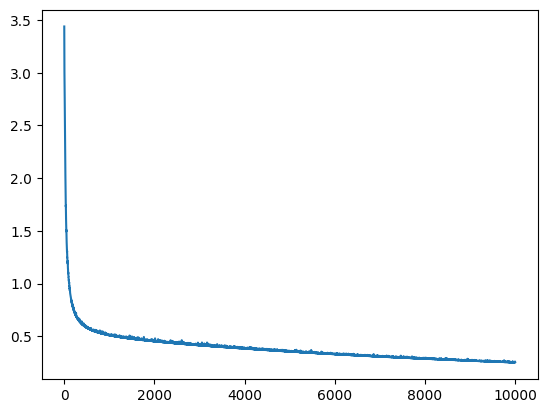

In [25]:
# training loop

def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 1000000
    learning_rate = 0.01
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
    
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
    
        target = point[2]
    
        # cost for current random point
        cost = np.square(pred - target)
    
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for p in data:
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_pred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
    
        dcost_dz = dcost_pred * dpred_dz
    
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
    
        w1 -= learning_rate * dcost_dw1
        w2 -= learning_rate * dcost_dw2
        b -= learning_rate * dcost_db

    return costs, w1, w2, b

costs, w1, w2, b = train()

fig = plt.plot(costs)

In [31]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print('blue', pred) if pred < 0.5 else print('red', pred)

red 0.9999404045024796


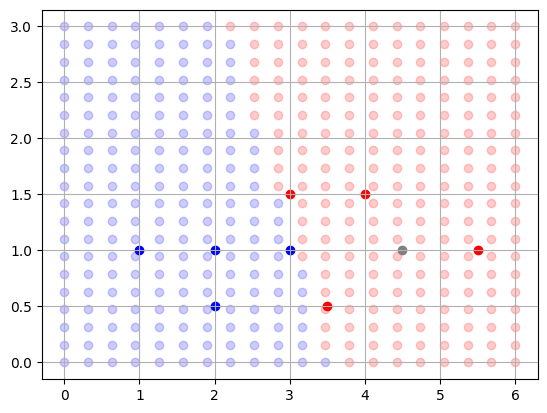

In [36]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point!
vis_data()